In [1]:
from keras.datasets import imdb
import numpy as np
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

In [4]:
# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [5]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [6]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [7]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [8]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [9]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))




Train on 15000 samples, validate on 10000 samples
Epoch 1/20





15000/15000 [==============================] - 3s 209us/step - loss: 0.5096 - acc: 0.7799 - val_loss: 0.3824 - val_acc: 0.8672
Epoch 2/20
15000/15000 [==============================] - 3s 182us/step - loss: 0.3012 - acc: 0.9052 - val_loss: 0.2995 - val_acc: 0.8911
Epoch 3/20
15000/15000 [==============================] - 3s 225us/step - loss: 0.2162 - acc: 0.9279 - val_loss: 0.3087 - val_acc: 0.8720
Epoch 4/20
15000/15000 [==============================] - 4s 280us/step - loss: 0.1729 - acc: 0.9438 - val_loss: 0.2838 - val_acc: 0.8843
Epoch 5/20
15000/15000 [==============================] - 5s 302us/step - loss: 0.1399 - acc: 0.9549 - val_loss: 0.2856 - val_acc: 0.8863
Epoch 6/20
15000/15000 [==============================] - 5s 328us/step - loss: 0.1121 - acc: 0.9659 - val_loss: 0.3144 - val_acc: 0.8784
Epoch 7/20
15000/15000 [==============================] - 3s 232us/step - loss: 0.0950 - acc: 0.9717 - val_loss: 0

In [10]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [11]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

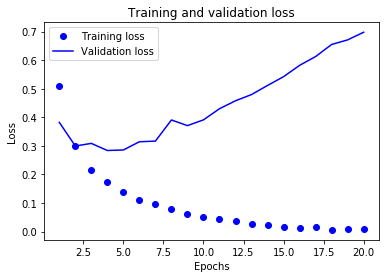

In [12]:
epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

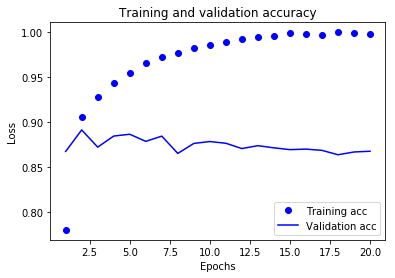

In [13]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [14]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 3s 112us/step - loss: 0.4749 - acc: 0.8217
Epoch 2/4
25000/25000 [==============================] - 2s 97us/step - loss: 0.2666 - acc: 0.9095
Epoch 3/4
25000/25000 [==============================] - 3s 134us/step - loss: 0.1986 - acc: 0.9296
Epoch 4/4
25000/25000 [==============================] - 5s 213us/step


In [15]:
results

[0.3243550157356262, 0.87292]

In [16]:
model.predict(x_test)

array([[0.13534573],
       [0.99971175],
       [0.27907127],
       ...,
       [0.07044488],
       [0.04262435],
       [0.47498566]], dtype=float32)